# Predicting Loan Defaults w/ Natural Language Processing (NLP) #
## 3.0 Baseline Modelling ##

Created on Tues Feb 12 12:12:23 2019

@author: Greenwood Group

## STEP 3: Basic Modelling ##

### 3.1 Import required libraries ###

In [1]:
# System libraries
import os
import sys
import time
import warnings

# Basic Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from imblearn.over_sampling import SMOTE

# ### Turn off Depreciation and Future warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

if not sys.warnoptions:
    warnings.simplefilter('ignore')

% matplotlib inline

pd.set_option('precision', 3) # set the precision of numerical representation
pd.set_option('expand_frame_repr', True)

### 3.2 Prepare for reproducability ###

In [2]:
# Set random seed to maintain reproducability
random_state = np.random.seed(42)

# Set the plotting style
plt.style.use('seaborn-whitegrid')

sns.set(style="whitegrid", palette="PRGn", color_codes=True, font='sans-serif', font_scale=1.5)

### 3.3 Import data ###

In [3]:
# Import the dataset
# Set the path to data
filename = '../data/processed/2.0-gg-preprocessed-data.csv'

# Read the data into memory
%time df = pd.read_csv(filename)

CPU times: user 74 ms, sys: 16.6 ms, total: 90.6 ms
Wall time: 89.3 ms


### 3.4 Separate dependent (target) and independent variables ###

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amount,7988.0,7.088e+02,585.049,25.0,375.0,600.0,925.0,5000.0
sector_Agriculture,7988.0,1.382e-01,0.345,0.0,0.0,0.0,0.0,1.0
sector_Arts,7988.0,1.803e-02,0.133,0.0,0.0,0.0,0.0,1.0
sector_Clothing,7988.0,1.352e-01,0.342,0.0,0.0,0.0,0.0,1.0
sector_Construction,7988.0,1.114e-02,0.105,0.0,0.0,0.0,0.0,1.0
sector_Education,7988.0,2.253e-03,0.047,0.0,0.0,0.0,0.0,1.0
sector_Entertainment,7988.0,5.008e-04,0.022,0.0,0.0,0.0,0.0,1.0
sector_Food,7988.0,3.045e-01,0.460,0.0,0.0,0.0,1.0,1.0
sector_Health,7988.0,1.953e-02,0.138,0.0,0.0,0.0,0.0,1.0
sector_Housing,7988.0,4.382e-03,0.066,0.0,0.0,0.0,0.0,1.0


In [5]:
df.head(1).T

,0
loan_amount,500
sector_Agriculture,1
sector_Arts,0
sector_Clothing,0
sector_Construction,0
sector_Education,0
sector_Entertainment,0
sector_Food,0
sector_Health,0
sector_Housing,0


In [6]:
# Separate dependent (target) and independent variables
%time x = df.iloc[:, :-2].values # independent variables (not including text)
%time y = df.iloc[:, -1].values # dependent variable

CPU times: user 1.35 ms, sys: 946 µs, total: 2.3 ms
Wall time: 1.34 ms
CPU times: user 126 µs, sys: 0 ns, total: 126 µs
Wall time: 130 µs


### 3.5 Examine the encoded dependent and independent variables ###

In [7]:
print("Data in x: \n{}".format(x))
print("\nShape of x: {}".format(x.shape))
print("\nData in y: \n{}".format(y))
print("\nShape of y: {}".format(y.shape))

Data in x: 
[[500.   1.   0. ...   1.   0.   1.]
 [500.   0.   0. ...   1.   1.   1.]
 [500.   0.   0. ...   1.   0.   1.]
 ...
 [775.   0.   0. ...   0.   1.   0.]
 [275.   0.   0. ...   0.   1.   0.]
 [275.   0.   0. ...   1.   0.   0.]]

Shape of x: (7988, 19)

Data in y: 
[0 0 0 ... 1 1 1]

Shape of y: (7988,)


### 3.6 Split training and test data ###

In [8]:
# Load and split the data
%time X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = random_state)

CPU times: user 2.78 ms, sys: 1.79 ms, total: 4.57 ms
Wall time: 2.87 ms


### 3.7 Feature scaling ###

In [9]:
# Feature scaling
# Standardization - x_stand = (x - mean(x)) / standard deviation (x)
# Normalization - x_norm = (x - min(x)) / (max(x) - min(x))

sc_x = StandardScaler()
%time X_train = sc_x.fit_transform(X_train)
%time X_test = sc_x.transform(X_test)

CPU times: user 3.51 ms, sys: 1.63 ms, total: 5.14 ms
Wall time: 3.57 ms
CPU times: user 681 µs, sys: 247 µs, total: 928 µs
Wall time: 655 µs


### 3.8 Examine the training and test data ###

In [10]:
print("No. of transactions in the X_train dataset: ", X_train.shape)
print("No. of transactions in the y_train dataset: ", y_train.shape)
print("No. of transactions in the X_test dataset: ", X_test.shape)
print("No. of transactions in the y_test dataset: ", y_test.shape)
print("\nCounts of label '1' (paid) before oversampling: {}".format(sum(y_train == 1)))
print("Counts of label '0' (defaulted) before oversampling: {} \n".format(sum(y_train == 0)))

# Oversample the training data using SMOTE
sm = SMOTE(random_state=42, ratio = 1.0)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

print('Shape of X_train after oversampling: {}'.format(X_train.shape))
print('Shape of y_train after oversampling: {} \n'.format(y_train.shape))
print("Counts of label '1' (paid) after oversampling: {}".format(sum(y_train == 1)))
print("Counts of label '0' (defaulted) after oversampling: {}".format(sum(y_train == 0)))

No. of transactions in the X_train dataset:  (5991, 19)
No. of transactions in the y_train dataset:  (5991,)
No. of transactions in the X_test dataset:  (1997, 19)
No. of transactions in the y_test dataset:  (1997,)

Counts of label '1' (paid) before oversampling: 3450
Counts of label '0' (defaulted) before oversampling: 2541 

Shape of X_train after oversampling: (6900, 19)
Shape of y_train after oversampling: (6900,) 

Counts of label '1' (paid) after oversampling: 3450
Counts of label '0' (defaulted) after oversampling: 3450


### 3.9 Perform PCA to determine ideal number of components ###

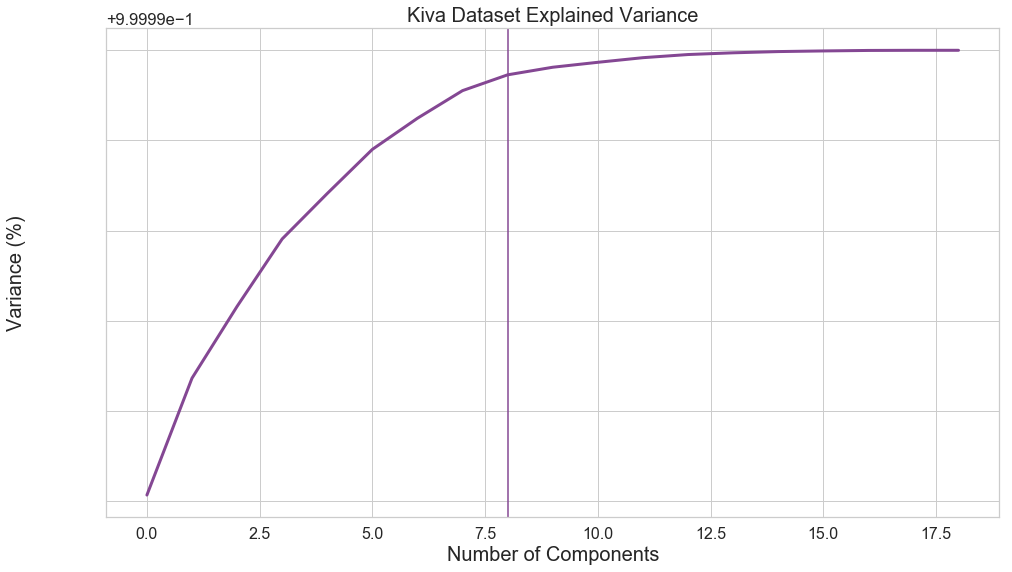

CPU times: user 835 ms, sys: 90.8 ms, total: 925 ms
Wall time: 152 ms


In [11]:
# Fit PCA algorithm with the training data
pca = PCA().fit(x)

# Plot Cummulative Summation of the Explained Variance
fig = plt.figure(figsize=(16, 9))
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=3)
plt.xlabel('Number of Components', fontsize=20)
plt.ylabel('Variance (%)', fontsize=20) # for each component
plt.title('Kiva Dataset Explained Variance', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
#plt.tick_params(axis='both', which='major', labelsize=16)
plt.yticks(color="white")
#plt.yticks(np.arange(0.000005, 0.000010))
plt.axvline(x=8, ymax=8)
%time plt.show()

fig.savefig('../reports/figures/3.1_gg_pca_explained_variance_kiva_loans_data.png',
            dpi=300,
            bbox_inches='tight');

### 3.10 Setup the pipelines for the models to be used ###

In [12]:
# Logistic Regression (LogReg) model
pipe_lr = Pipeline([('clf', LogisticRegression(random_state = random_state))])

# Logistic Regression (LogReg) model with Principal Component Analysis (PCA)
pipe_lr_pca = Pipeline([('pca', PCA(n_components = 8)),
                        ('clf', LogisticRegression(random_state = 42))])

# Random Forest (RF) model
pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state = random_state))])

# Random Forest (RF) model with Principal Component Analysis (PCA)
pipe_rf_pca = Pipeline([('pca', PCA(n_components = 8)),
                        ('clf', RandomForestClassifier(random_state = 42))])

# Support Vector Machine (SVM) model
pipe_svm = Pipeline([('clf', SVC(random_state = random_state))])

# Support Vector Machine (SVM) model with Principal Component Analysis (PCA)
pipe_svm_pca = Pipeline([('pca', PCA(n_components = 8)),
                         ('clf', SVC(random_state = 42))])

# XGBoost model
pipe_xgb = Pipeline([('clf', XGBClassifier(random_state = random_state))])

# ExtraTrees model
pipe_xtc = Pipeline([('clf', ExtraTreesClassifier(random_state = random_state))])

# AdaBoost model
pipe_ab = Pipeline([('clf', AdaBoostClassifier(random_state = random_state))])


### 3.11 Setup the grid search parameters for the models to be used ###

In [13]:
# GridSearch hyperparameters for LR models
grid_params_lr = [{'clf__penalty': ['l1', 'l2'], # used to specify the norm used in the penalization
                   'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 200, 500], # inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
                   'clf__solver': ['liblinear']}]  # algorithm to use in the optimization problem

# GridSearch hyperparameters for RF models
grid_params_rf = [{'clf__bootstrap': [True],
                   'clf__criterion': ['entropy'], # function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
                   'clf__max_depth': [10, 20, None], # maximum depth of the tree
                   'clf__max_features': ['auto'],
                   'clf__max_leaf_nodes': [None],
                   'clf__min_impurity_decrease': [0.0],
                   'clf__min_impurity_split': [None],
                   'clf__min_samples_leaf': [1, 5, 10, 30, 50], # minimum number of samples required to be at a leaf node
                   'clf__min_samples_split': [5, 10, 15], # minimum number of samples required to split an internal node
                   'clf__n_estimators': [100, 200, 300, 400, 500],
                   'clf__oob_score': [False]}] 

# GridSearch hyperparameters for SVM models
grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], # specifies the kernel type to be used in the algorithm
                    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]}] # penalty parameter C of the error term

# GridSearch hyperparameters for XGBoost models
grid_params_xgb = [{'clf__objective':['binary:logistic'], 
                    'clf__n_estimators': [1000], # 50, 100, 500],
                    'clf__learning_rate': [0.01], # 0.05, 0.1],
                    'clf__max_depth': [50], # 5, 10],
                    'clf__eval_metric': ['auc'],
                    'clf__subsample': [0.9], # 0.9, 1],
                    'clf__seed': [123]}]

# GridSearch hyperparameters for ExtraTrees models
grid_params_xtc = [{'clf__n_estimators': [50], #25, 50, 100, 200, 300, 400, 500],
                    'clf__criterion': ['entropy'], 
                    'clf__max_depth': [5, 10, None], 
                    'clf__min_samples_split': [3], #2, 4, 6, 8, 10, 12, 15], 
                    'clf__min_samples_leaf': [2, 3], #1, 5, 10, 20, 30, 50],
                    'clf__min_weight_fraction_leaf': [0.0], 
                    'clf__max_features': ['auto'],
                    'clf__max_leaf_nodes': [None], 
                    'clf__min_impurity_decrease': [0.0], 
                    'clf__min_impurity_split': [None], 
                    'clf__bootstrap': [False],
                    'clf__oob_score': [False]}]
                    
# GridSearch hyperparameters for AdaBoost models
grid_params_ab = [{'clf__base_estimator': [None],
                    'clf__n_estimators': [100], #, 50, 100, 200, 300, 400, 500],
                    'clf__learning_rate': [0.01, 0.1, 1.0],
                    'clf__algorithm': ['SAMME.R']}]


### 3.12 Construct grid searches ###

In [14]:
jobs = -1

gs_lr = GridSearchCV(estimator = pipe_lr, # is assumed to implement the scikit-learn estimator interface
                     param_grid = grid_params_lr, # dictionary with parameters names (string) as keys and lists of parameter settings to try as values
                     scoring = 'roc_auc', # metric(s) used to evaluate the predictions on the test set
                     cv = 10) # cross-validation splitting strategy (k-fold cross-validation)

gs_lr_pca = GridSearchCV(estimator = pipe_lr_pca,
                         param_grid = grid_params_lr,
                         scoring = 'roc_auc',
                         cv = 10)

gs_rf = GridSearchCV(estimator = pipe_rf,
                     param_grid = grid_params_rf,
                     scoring = 'roc_auc',
                     cv = 10,
                     n_jobs = jobs)

gs_rf_pca = GridSearchCV(estimator = pipe_rf_pca,
                         param_grid = grid_params_rf,
                         scoring = 'roc_auc',
                         cv= 10, 
                         n_jobs = jobs)

gs_svm = GridSearchCV(estimator = pipe_svm,
                      param_grid = grid_params_svm,
                      scoring = 'roc_auc',
                      cv = 10,
                      n_jobs = jobs)

gs_svm_pca = GridSearchCV(estimator = pipe_svm_pca,
                          param_grid = grid_params_svm,
                          scoring = 'roc_auc',
                          cv = 10,
                          n_jobs = jobs)

gs_xgb = GridSearchCV(estimator = pipe_xgb,
                      param_grid = grid_params_xgb,
                      scoring = 'roc_auc',
                      cv = 10,
                      n_jobs = jobs)

gs_xtc = GridSearchCV(estimator = pipe_xtc,
                      param_grid = grid_params_xtc,
                      scoring = 'roc_auc',
                      cv = 10,
                      n_jobs = jobs)

gs_ab = GridSearchCV(estimator = pipe_ab,
                      param_grid = grid_params_ab,
                      scoring = 'roc_auc',
                      cv = 10,
                      n_jobs = jobs)


### 3.13 List pipelines and dictionary of pipeline and gridsearch classifiers ###

In [15]:
# List of grids
#grids = [gs_ab]
grids = [gs_lr, gs_lr_pca, gs_rf, gs_rf_pca, gs_svm, gs_xgb, gs_xtc, gs_ab]

In [16]:
#grid_dict = {0: 'XGBoost'}
grid_dict = {0: 'Logistic Regression', 
             1: 'Logistic Regression w PCA',
             2: 'Random Forest',
             3: 'Random Forest w PCA',
             4: 'Support Vector Machine',
             5: 'XGBoost',
             6: 'Extra Trees',
             7: 'AdaBoost'}

### 3.14 Define model structures ###

In [17]:
def model_results(grids, grid_dict, model_type='Basic Model'):
    # Add a timer
    start = time.time()

    # Fit the grid search objects
    print('\nPerforming {} optimizations...'.format(model_type))

    best_f1_score = 0.0
    best_roc_auc = 0.0
    best_clf = 0
    best_gs = ''
    
    # Process each GridSearch object in sequence
    for idx, gs in enumerate(grids):

                print('\nEstimator: {} - {}'.format(grid_dict[idx], model_type))
                # Fit grid search
                gs.fit(X_train, y_train)
                # Best params for this grid search
                print('\nBest params: {}'.format(gs.best_params_))
                # Best training data accuracy for this grid search
                print('\nTraining set accuracy score for best params: {0:.3f}%'.format(gs.best_score_ * 100))
                # Predict on test data with best params
                y_pred = gs.predict(X_test)
                # Test data accuracy and confusion matrix of model with best params
                print('Test set accuracy score for best params: {0:.3f}%'.format(accuracy_score(y_test, y_pred) * 100))
                print('\nConfusion Matrix:\n {}'.format(confusion_matrix(y_test, y_pred)))

                FP = confusion_matrix(y_test, y_pred)[0][1]
                FN = confusion_matrix(y_test, y_pred)[1][0]
                TP = confusion_matrix(y_test, y_pred)[1][1]
                TN = confusion_matrix(y_test, y_pred)[0][0]
                
                type_1_error = FP / (FP + FN + TP +TN)
                type_2_error = FN / (FP + FN + TP +TN)
                
                # Print details about the confusion matrix
                print('\nTP: {}'.format(TP))
                print('TN: {}'.format(TN))
                print('FP: {}'.format(FP))
                print('FN: {}'.format(FN))
                
                print('\nType I Error (percent): {0:.3f}%'.format(type_1_error * 100))
                print('Type II Error (percent): {0:.3f}%'.format(type_2_error * 100)) 
                print('\nClassification Report:\n {}'.format(classification_report(y_test, y_pred)))

                print(grid_dict[idx])

                if grid_dict[idx] != 'Random Forest' and grid_dict[idx] != 'Random Forest w PCA' and grid_dict[idx] != 'XGBoost' and grid_dict[idx] != 'Extra Trees':
                    y_pred_sample_score = gs.decision_function(X_test)
                else:
                    y_pred_sample_score = gs.predict_proba(X_test)[:, 1]

                fpr, tpr, _ = roc_curve(y_test, y_pred_sample_score)
                roc_auc = auc(fpr,tpr)

                # Plot the Receiver Operating Characteristic (ROC) Curve
                fig = plt.figure(figsize=(16,9))
                plt.title('ROC Curve: {} - {}'.format(grid_dict[idx], model_type), fontsize=20)
                plt.plot(fpr, tpr, 'b', label = 'AUC = {0:.4f}'.format(roc_auc), linewidth=3)
                plt.legend(loc = 'lower right', fontsize=36)
                plt.plot([0, 1],[0, 1],'r--', linewidth=3)
                plt.xlim([-0.1, 1.0])
                plt.ylim([-0.1, 1.01])
                plt.ylabel('True Positive (TP) Rate', fontsize=20)
                plt.xlabel('False Positive (FP) Rate', fontsize=20)
                plt.tick_params(axis='both', which='major', labelsize=16)
                plt.show()

                fig.savefig('../reports/figures/3.1_gg_roc_curve_{}_{}.png'.format(grid_dict[idx].replace(" ", "_").lower(), model_type.replace(" ", "_").lower()), bbox_inches='tight')

                print('\nROC Area Under the Curve (AUC): {0:.3f}%'.format(roc_auc * 100))

                elapsed_time = int(time.time() - start)

                print('\nElapsed time in minutes: {0:.3f}'.format(0.1 * round((elapsed_time) / 6)))

                # Track best (highest roc_auc) model
                if roc_auc > best_roc_auc:

                    best_roc_auc = roc_auc
                    best_gs = gs
                    best_clf = idx

#    df_results.append(pd.DataFrame(grid_dict[idx].replace(" ", "_").lower(), best_roc_auc) , ignore_index=True)
    
    print('\nClassifier with best test set roc_auc: {} Model'.format(grid_dict[best_clf]))

    # Elapsed time in minutes
    elapsed_time = int(time.time() - start)
    print('\nTotal elapsed time in minutes: {0:.3f}'.format(0.1 * round((elapsed_time) / 6)))

    # Add an end of work message
    os.system('say "your {} {} has finished training"'.format(grid_dict[best_clf], model_type))
    
    # Save best grid search pipeline to file
    dump_file = '../models/best_gs_pipeline_model_{}_{}.pkl'.format(grid_dict[best_clf].replace(" ", "_").lower(), model_type.replace(" ", "_").lower())
    joblib.dump(best_gs, dump_file, compress = 1)

    print('\nSaved {} grid search pipeline model to file: {}'.format(grid_dict[best_clf], dump_file))

    # Save model to file
    #save_to_file = '../models/best_gs_pipeline_model_{}.h5'.format(grid_dict[best_clf].replace(" ", "_").lower())

    # Save the best model to file
    #gs.best_estimator_.model.save(save_to_file)

    #print('\nSaved {} grid search pipeline model to file: {}'.format(grid_dict[best_clf], save_to_file))


Performing Basic Model optimizations...

Estimator: Logistic Regression - Basic Model

Best params: {'clf__C': 1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}

Training set accuracy score for best params: 92.711%
Test set accuracy score for best params: 87.782%

Confusion Matrix:
 [[ 741  129]
 [ 115 1012]]

TP: 1012
TN: 741
FP: 129
FN: 115

Type I Error (percent): 6.460%
Type II Error (percent): 5.759%

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       870
           1       0.89      0.90      0.89      1127

   micro avg       0.88      0.88      0.88      1997
   macro avg       0.88      0.87      0.88      1997
weighted avg       0.88      0.88      0.88      1997

Logistic Regression


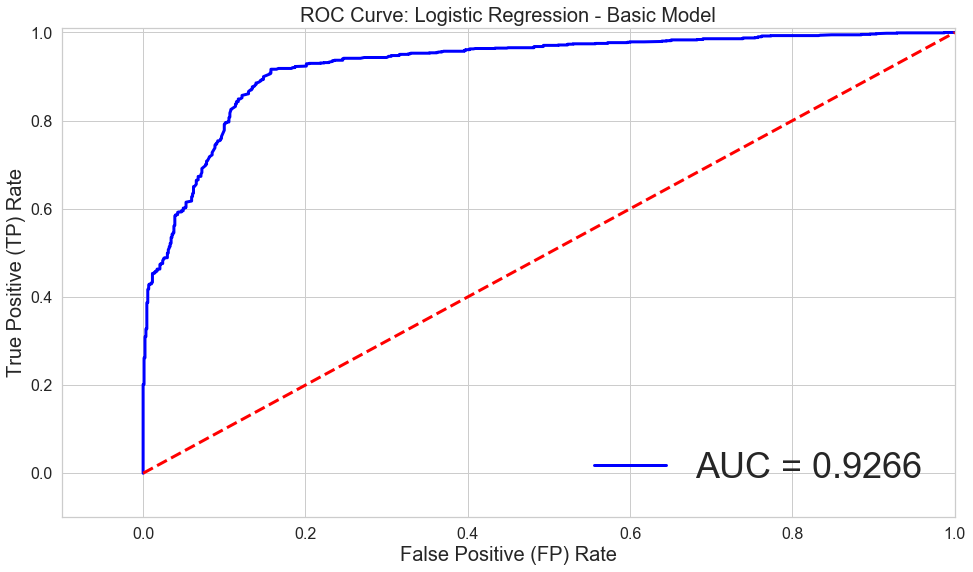


ROC Area Under the Curve (AUC): 92.662%

Elapsed time in minutes: 0.100

Estimator: Logistic Regression w PCA - Basic Model

Best params: {'clf__C': 0.01, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}

Training set accuracy score for best params: 83.286%
Test set accuracy score for best params: 74.362%

Confusion Matrix:
 [[586 284]
 [228 899]]

TP: 899
TN: 586
FP: 284
FN: 228

Type I Error (percent): 14.221%
Type II Error (percent): 11.417%

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.70       870
           1       0.76      0.80      0.78      1127

   micro avg       0.74      0.74      0.74      1997
   macro avg       0.74      0.74      0.74      1997
weighted avg       0.74      0.74      0.74      1997

Logistic Regression w PCA


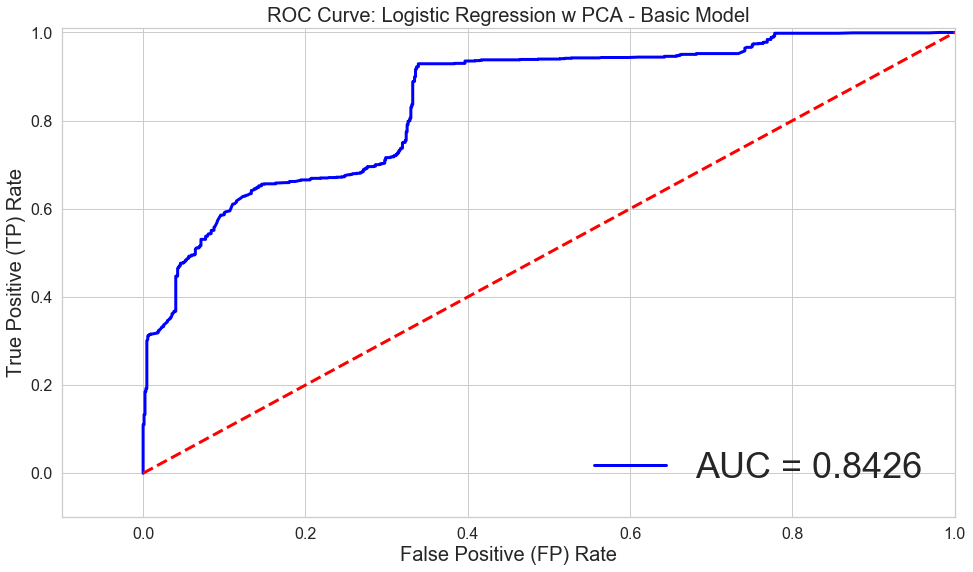


ROC Area Under the Curve (AUC): 84.261%

Elapsed time in minutes: 0.100

Estimator: Random Forest - Basic Model

Best params: {'clf__bootstrap': True, 'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__max_features': 'auto', 'clf__max_leaf_nodes': None, 'clf__min_impurity_decrease': 0.0, 'clf__min_impurity_split': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 300, 'clf__oob_score': False}

Training set accuracy score for best params: 96.994%
Test set accuracy score for best params: 91.087%

Confusion Matrix:
 [[ 734  136]
 [  42 1085]]

TP: 1085
TN: 734
FP: 136
FN: 42

Type I Error (percent): 6.810%
Type II Error (percent): 2.103%

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       870
           1       0.89      0.96      0.92      1127

   micro avg       0.91      0.91      0.91      1997
   macro avg       0.92      0.90      0.91      1997
weighted avg       

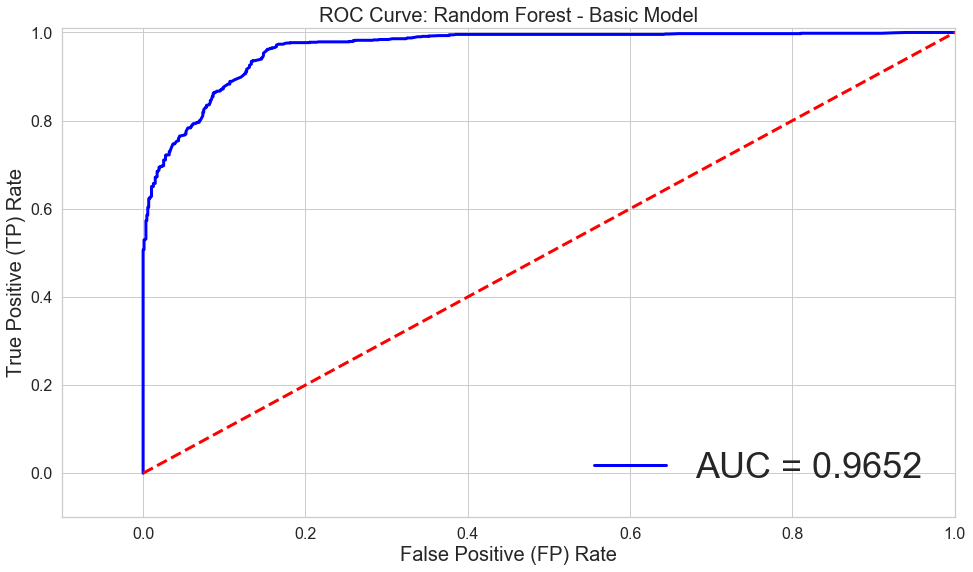


ROC Area Under the Curve (AUC): 96.517%

Elapsed time in minutes: 8.000

Estimator: Random Forest w PCA - Basic Model

Best params: {'clf__bootstrap': True, 'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__max_features': 'auto', 'clf__max_leaf_nodes': None, 'clf__min_impurity_decrease': 0.0, 'clf__min_impurity_split': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 15, 'clf__n_estimators': 500, 'clf__oob_score': False}

Training set accuracy score for best params: 96.708%
Test set accuracy score for best params: 90.636%

Confusion Matrix:
 [[ 736  134]
 [  53 1074]]

TP: 1074
TN: 736
FP: 134
FN: 53

Type I Error (percent): 6.710%
Type II Error (percent): 2.654%

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       870
           1       0.89      0.95      0.92      1127

   micro avg       0.91      0.91      0.91      1997
   macro avg       0.91      0.90      0.90      1997
weighted avg

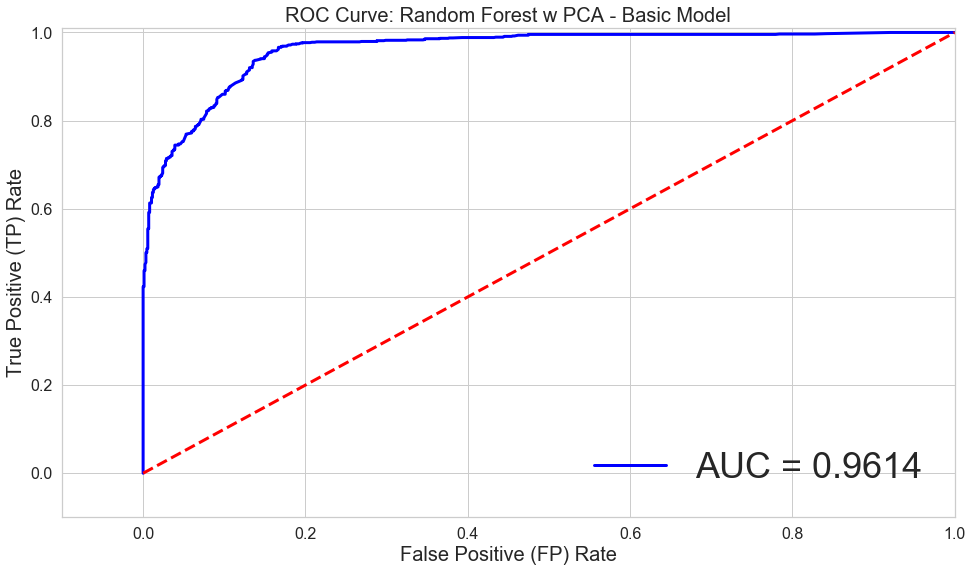


ROC Area Under the Curve (AUC): 96.138%

Elapsed time in minutes: 21.900

Estimator: Support Vector Machine - Basic Model

Best params: {'clf__C': 10, 'clf__kernel': 'rbf'}

Training set accuracy score for best params: 95.660%
Test set accuracy score for best params: 90.736%

Confusion Matrix:
 [[ 721  149]
 [  36 1091]]

TP: 1091
TN: 721
FP: 149
FN: 36

Type I Error (percent): 7.461%
Type II Error (percent): 1.803%

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89       870
           1       0.88      0.97      0.92      1127

   micro avg       0.91      0.91      0.91      1997
   macro avg       0.92      0.90      0.90      1997
weighted avg       0.91      0.91      0.91      1997

Support Vector Machine


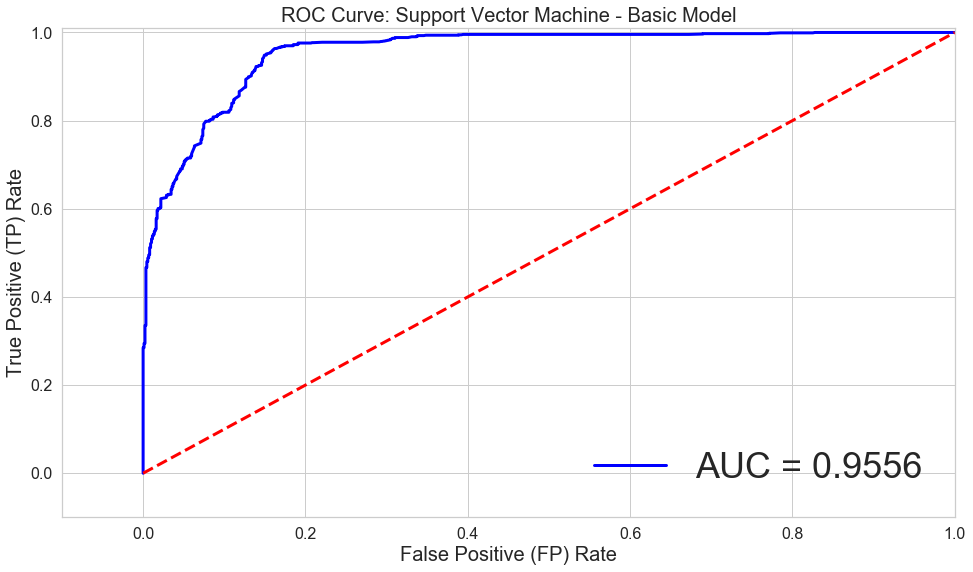


ROC Area Under the Curve (AUC): 95.565%

Elapsed time in minutes: 130.900

Estimator: XGBoost - Basic Model

Best params: {'clf__eval_metric': 'auc', 'clf__learning_rate': 0.01, 'clf__max_depth': 50, 'clf__n_estimators': 1000, 'clf__objective': 'binary:logistic', 'clf__seed': 123, 'clf__subsample': 0.9}

Training set accuracy score for best params: 97.084%
Test set accuracy score for best params: 90.235%

Confusion Matrix:
 [[ 763  107]
 [  88 1039]]

TP: 1039
TN: 763
FP: 107
FN: 88

Type I Error (percent): 5.358%
Type II Error (percent): 4.407%

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       870
           1       0.91      0.92      0.91      1127

   micro avg       0.90      0.90      0.90      1997
   macro avg       0.90      0.90      0.90      1997
weighted avg       0.90      0.90      0.90      1997

XGBoost


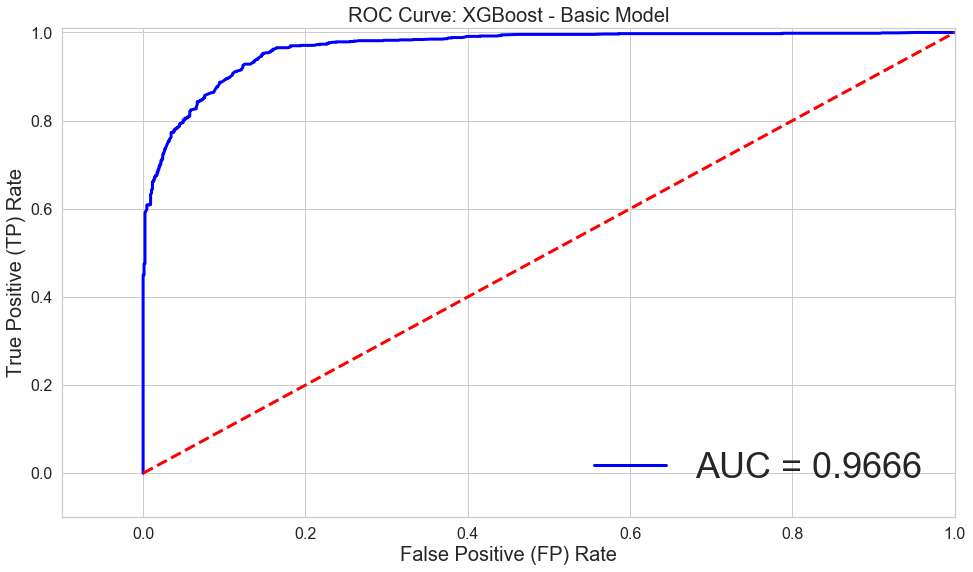


ROC Area Under the Curve (AUC): 96.659%

Elapsed time in minutes: 132.400

Estimator: Extra Trees - Basic Model

Best params: {'clf__bootstrap': False, 'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__max_features': 'auto', 'clf__max_leaf_nodes': None, 'clf__min_impurity_decrease': 0.0, 'clf__min_impurity_split': None, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 3, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 50, 'clf__oob_score': False}

Training set accuracy score for best params: 96.922%
Test set accuracy score for best params: 90.736%

Confusion Matrix:
 [[ 749  121]
 [  64 1063]]

TP: 1063
TN: 749
FP: 121
FN: 64

Type I Error (percent): 6.059%
Type II Error (percent): 3.205%

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       870
           1       0.90      0.94      0.92      1127

   micro avg       0.91      0.91      0.91      1997
   macro avg       0.91      0.90

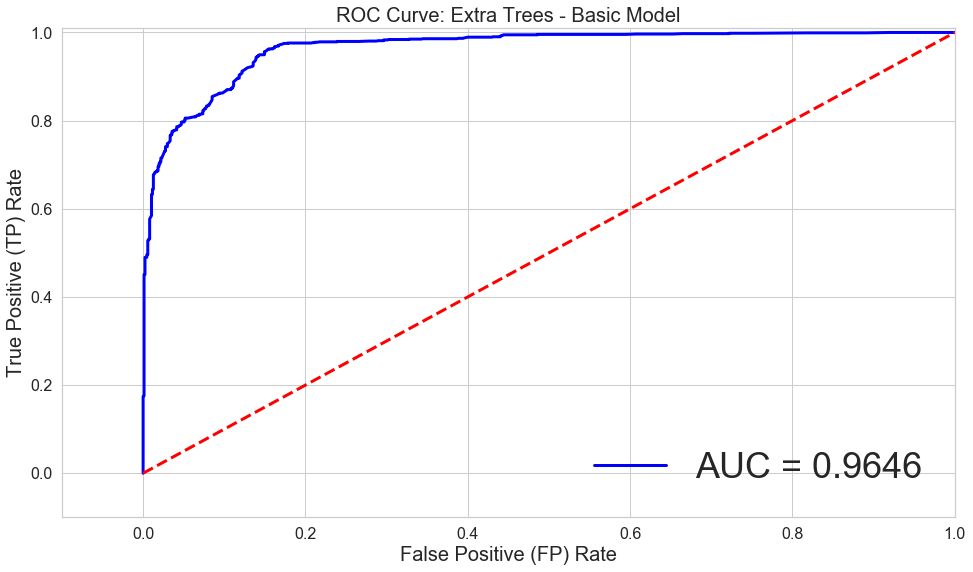


ROC Area Under the Curve (AUC): 96.458%

Elapsed time in minutes: 132.500

Estimator: AdaBoost - Basic Model

Best params: {'clf__algorithm': 'SAMME.R', 'clf__base_estimator': None, 'clf__learning_rate': 1.0, 'clf__n_estimators': 100}

Training set accuracy score for best params: 93.188%
Test set accuracy score for best params: 88.232%

Confusion Matrix:
 [[ 741  129]
 [ 106 1021]]

TP: 1021
TN: 741
FP: 129
FN: 106

Type I Error (percent): 6.460%
Type II Error (percent): 5.308%

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       870
           1       0.89      0.91      0.90      1127

   micro avg       0.88      0.88      0.88      1997
   macro avg       0.88      0.88      0.88      1997
weighted avg       0.88      0.88      0.88      1997

AdaBoost


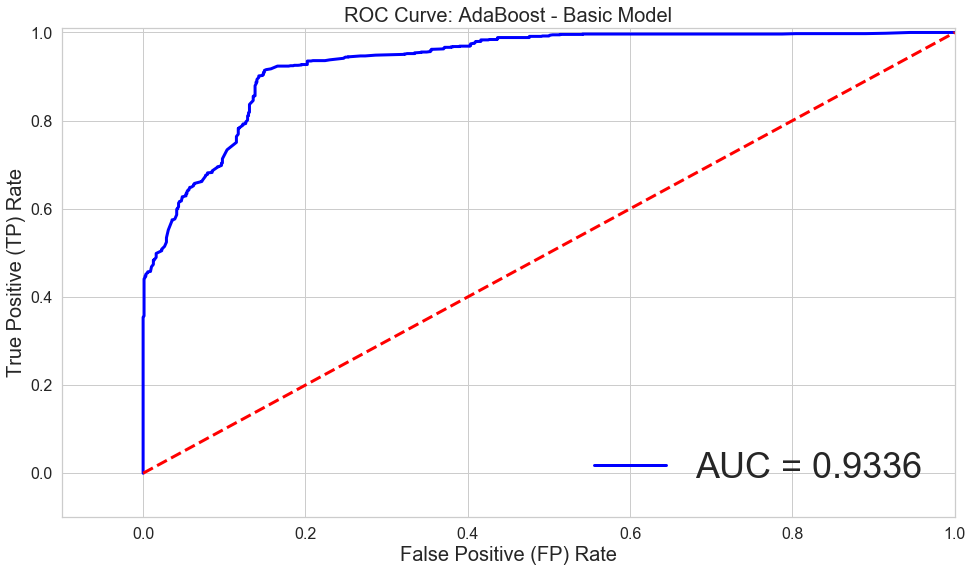


ROC Area Under the Curve (AUC): 93.359%

Elapsed time in minutes: 132.600

Classifier with best test set roc_auc: XGBoost Model

Total elapsed time in minutes: 132.600

Saved XGBoost grid search pipeline model to file: ../models/best_gs_pipeline_model_xgboost_basic_model.pkl


In [18]:
# Run the models
model_results(grids, grid_dict, model_type="Basic Model")